In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import warnings
import itertools
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
import statsmodels.graphics.tsaplots as tsa_plot

In [2]:
Air=pd.read_csv('Airlines.csv')

In [3]:
Air

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [4]:
Air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [6]:
Air=pd.read_csv('Airlines.csv',
               index_col=0,
               header=0,
               parse_dates=True)
Air

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


In [7]:
Air.index

Index(['Jan-95', 'Feb-95', 'Mar-95', 'Apr-95', 'May-95', 'Jun-95', 'Jul-95',
       'Aug-95', 'Sep-95', 'Oct-95', 'Nov-95', 'Dec-95', 'Jan-96', 'Feb-96',
       'Mar-96', 'Apr-96', 'May-96', 'Jun-96', 'Jul-96', 'Aug-96', 'Sep-96',
       'Oct-96', 'Nov-96', 'Dec-96', 'Jan-97', 'Feb-97', 'Mar-97', 'Apr-97',
       'May-97', 'Jun-97', 'Jul-97', 'Aug-97', 'Sep-97', 'Oct-97', 'Nov-97',
       'Dec-97', 'Jan-98', 'Feb-98', 'Mar-98', 'Apr-98', 'May-98', 'Jun-98',
       'Jul-98', 'Aug-98', 'Sep-98', 'Oct-98', 'Nov-98', 'Dec-98', 'Jan-99',
       'Feb-99', 'Mar-99', 'Apr-99', 'May-99', 'Jun-99', 'Jul-99', 'Aug-99',
       'Sep-99', 'Oct-99', 'Nov-99', 'Dec-99', 'Jan-00', 'Feb-00', 'Mar-00',
       'Apr-00', 'May-00', 'Jun-00', 'Jul-00', 'Aug-00', 'Sep-00', 'Oct-00',
       'Nov-00', 'Dec-00', 'Jan-01', 'Feb-01', 'Mar-01', 'Apr-01', 'May-01',
       'Jun-01', 'Jul-01', 'Aug-01', 'Sep-01', 'Oct-01', 'Nov-01', 'Dec-01',
       'Jan-02', 'Feb-02', 'Mar-02', 'Apr-02', 'May-02', 'Jun-02', 'Jul-02',

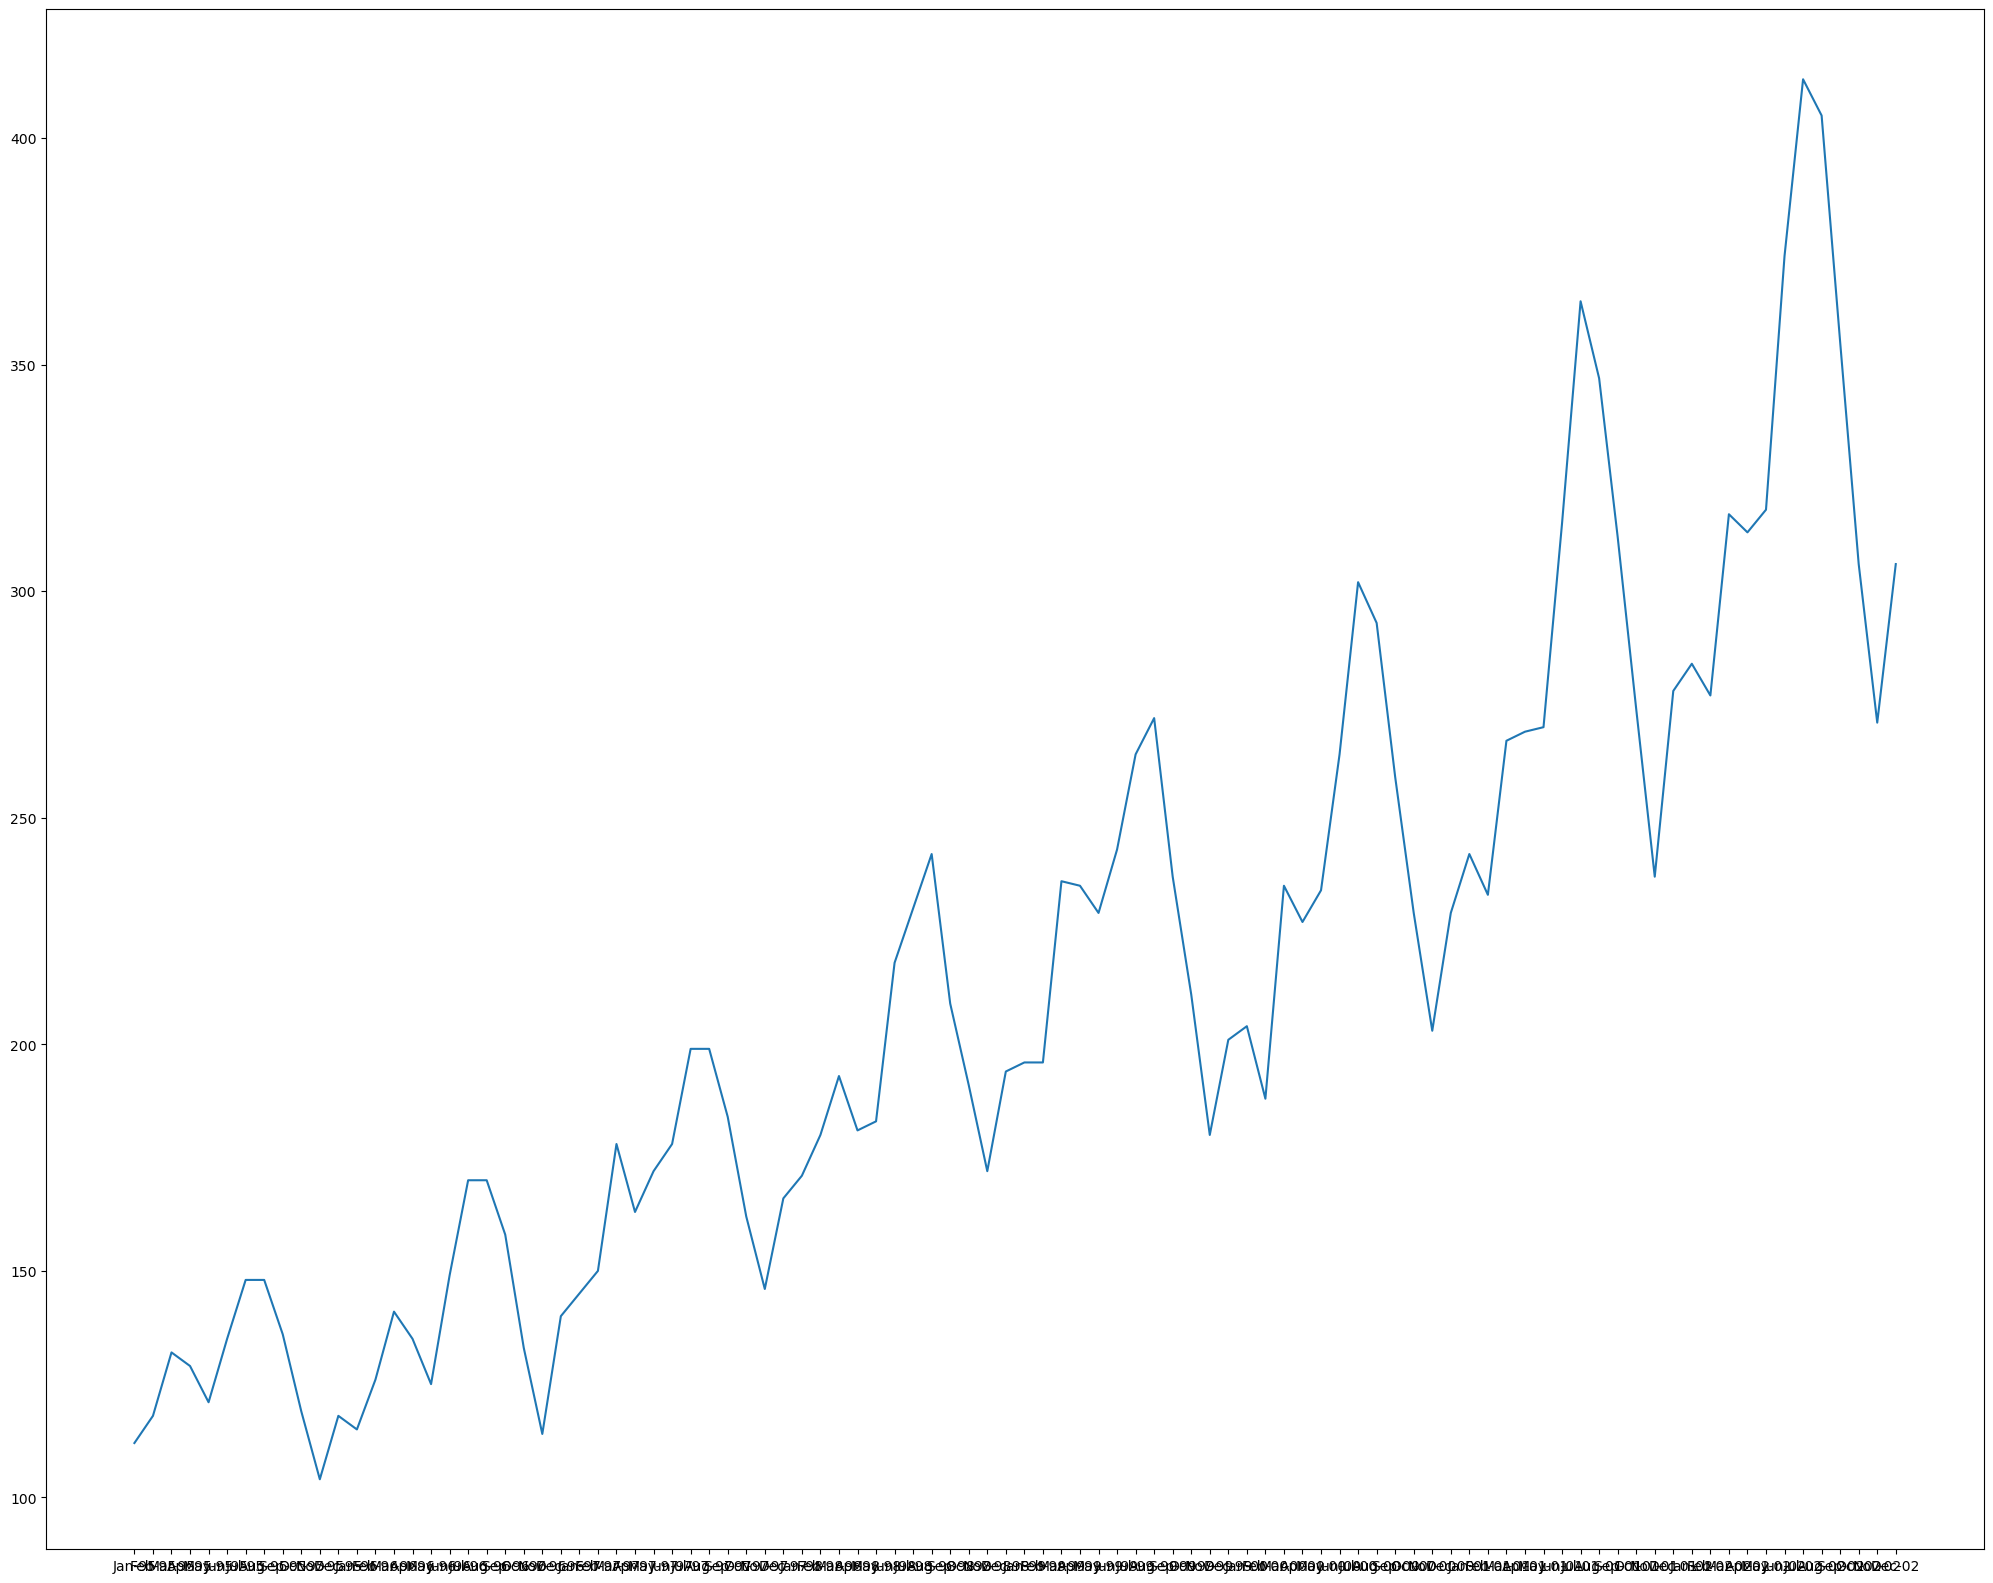

In [8]:
plt.figure(figsize=(25,20))
plt.plot(Air)

<AxesSubplot:ylabel='Frequency'>

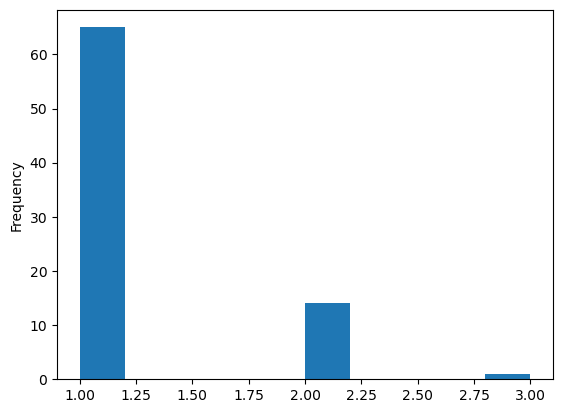

In [9]:
Air.Passengers.value_counts(ascending=True).plot(kind='hist')

<AxesSubplot:ylabel='Density'>

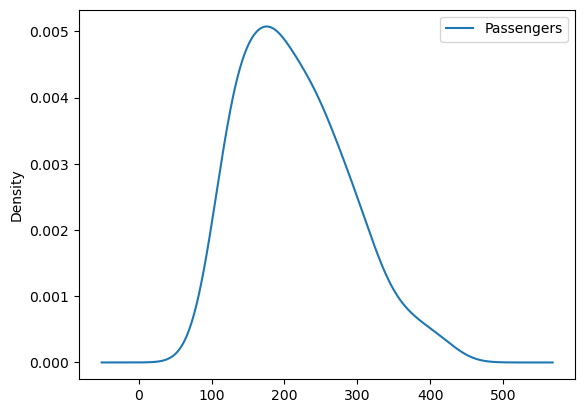

In [10]:
Air.plot(kind='kde')

In [32]:
Air = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
Air

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_22496\3024000954.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  Air = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [33]:
type(Air)

pandas.core.series.Series

In [34]:
group=Air.groupby(pd.Grouper(freq='A'))

In [35]:
group

In [36]:
years = pd.DataFrame()

for name, group in group:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

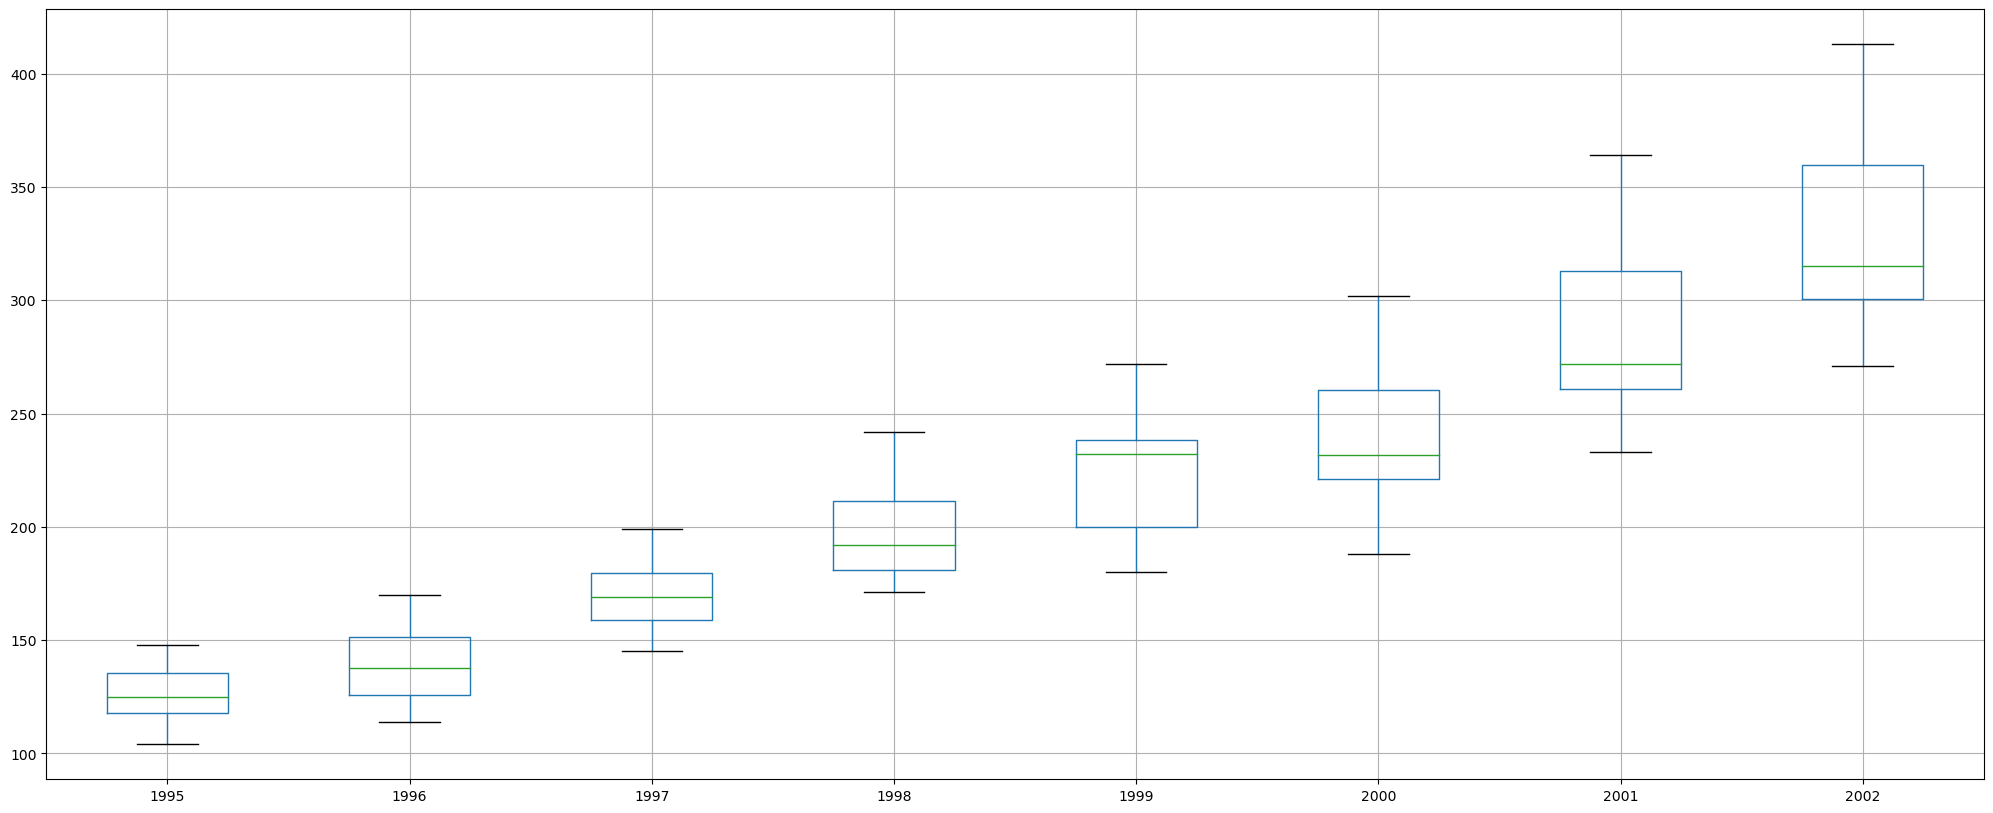

In [37]:
plt.figure(figsize = (25,10))
years.boxplot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

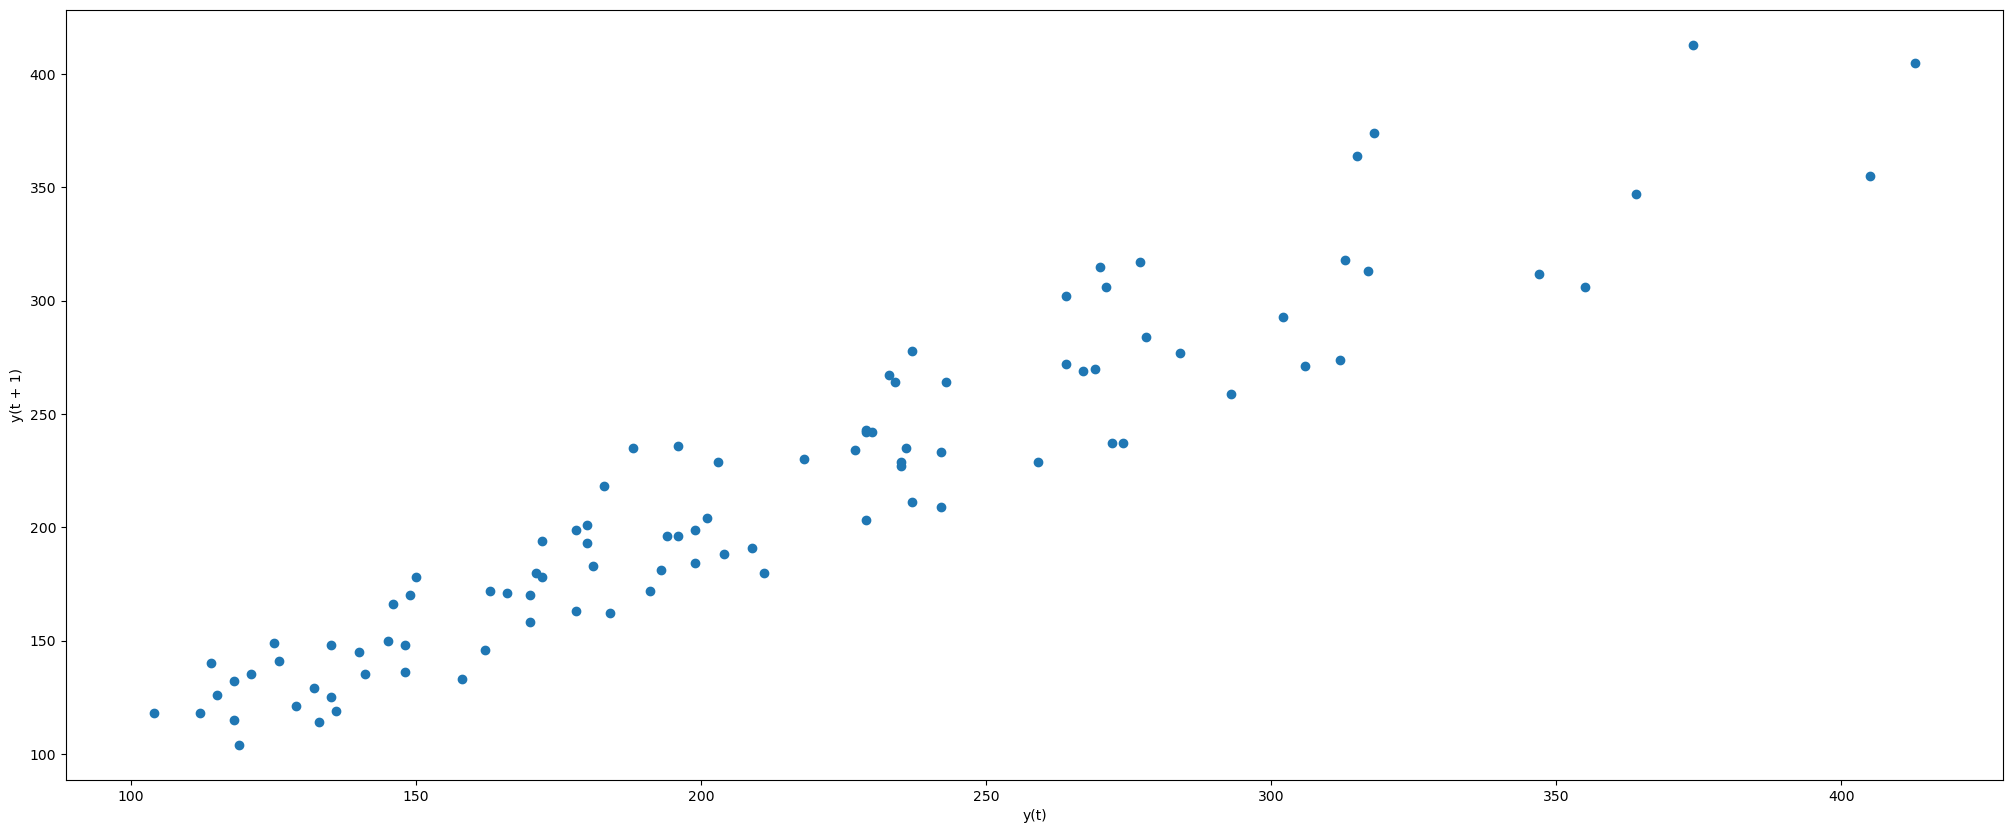

In [38]:
# create a scatter plot
plt.figure(figsize = (25,10))
pd.plotting.lag_plot(Air)

<Figure size 4000x1000 with 0 Axes>

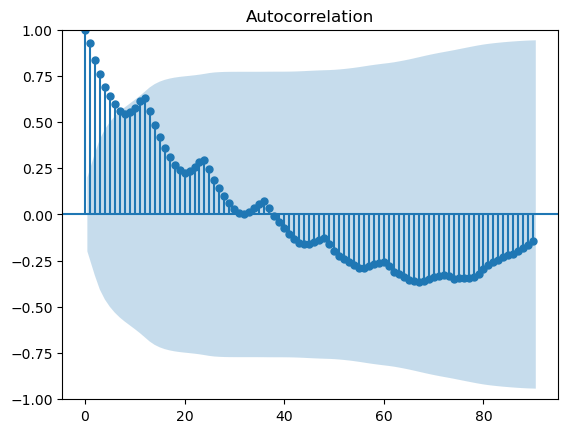

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (40,10))
plot_acf(Air, lags=90)
plt.show()

In [40]:
Air = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
Air

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_22496\3024000954.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  Air = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [41]:
Air.shape

(96,)

In [42]:
upsampled = Air.resample('D').mean()
upsampled.head(10)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
Freq: D, Name: Passengers, dtype: float64

In [43]:
interpolate = upsampled.interpolate(method='linear')
interpolate.head(10)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
Freq: D, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

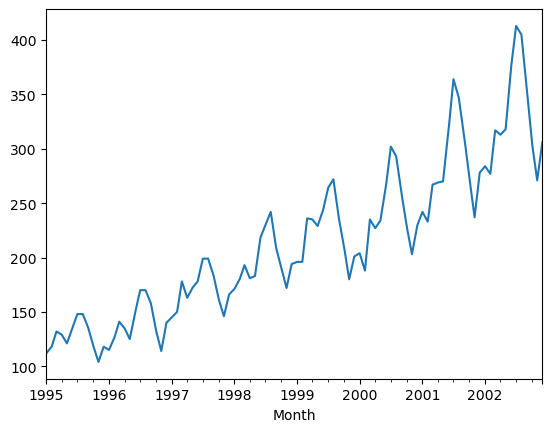

In [44]:
interpolate.plot()

<AxesSubplot:xlabel='Month'>

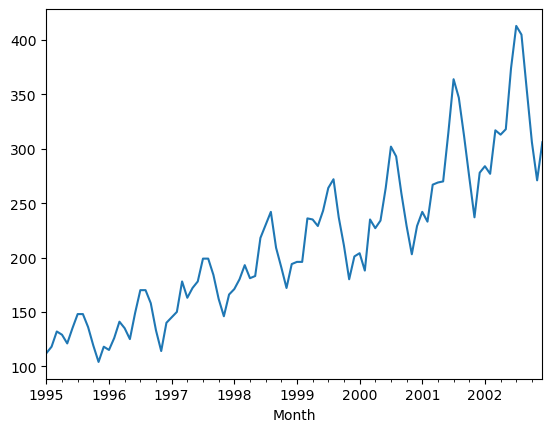

In [45]:
Air.plot()

In [47]:
resample=Air.resample('Q')
quarterly_mean_sales=resample.mean()

<AxesSubplot:xlabel='Month'>

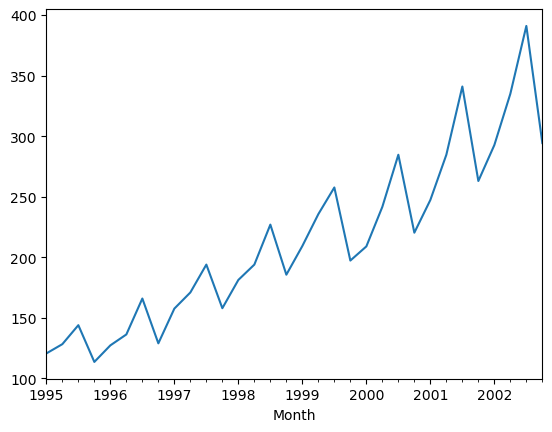

In [48]:
quarterly_mean_sales.plot()

In [50]:
Air=pd.read_excel("Airlines+Data.xlsx",index_col=0, parse_dates=['Month'])
Air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


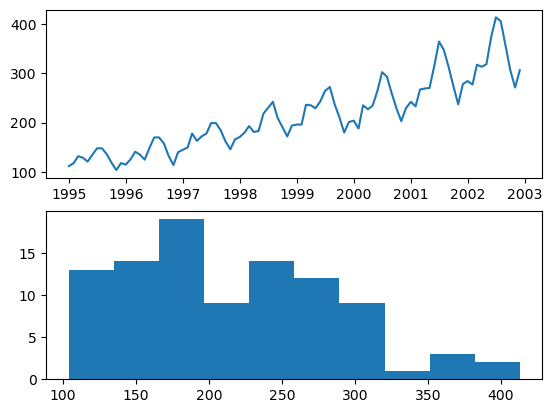

In [51]:
plt.subplot(211)
plt.plot(Air)
plt.subplot(212)
plt.hist(Air)

plt.show()

In [52]:
SD = pd.DataFrame(np.sqrt(Air.values), columns = ['Passengers'])
SD

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


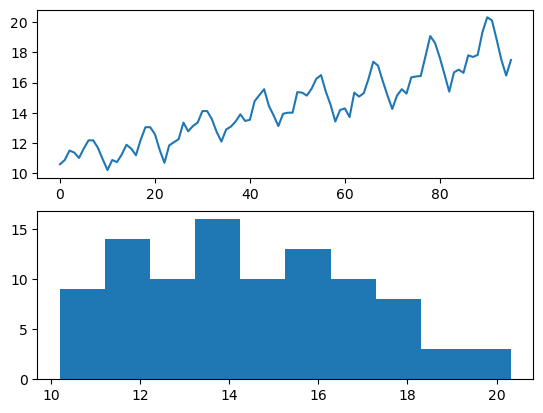

In [53]:
plt.subplot(211)
plt.plot(SD['Passengers'])

plt.subplot(212)
plt.hist(SD['Passengers'])
plt.show()

In [54]:
## LOg Transform
SD = pd.DataFrame(np.log(Air.values), columns = ['Passengers'])
SD

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


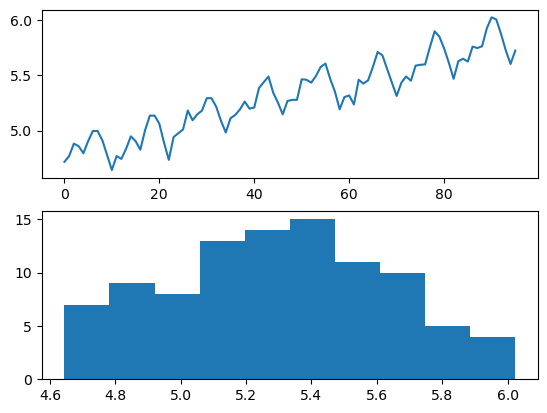

In [55]:
plt.subplot(211)
plt.plot(SD['Passengers'])


plt.subplot(212)
plt.hist(SD['Passengers'])
plt.show()

In [56]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

Forecasting - Model Based Methods

In [57]:
Air=pd.read_excel("Airlines+Data.xlsx")
Air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

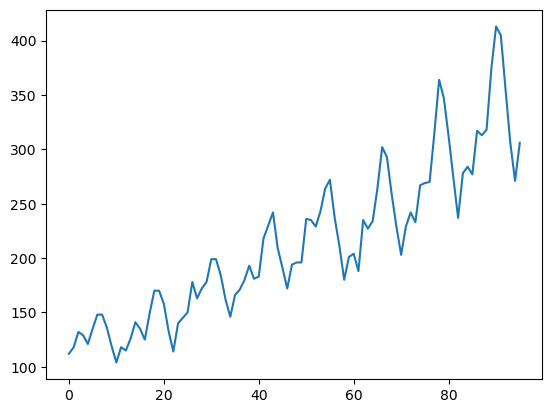

In [58]:
Air['Passengers'].plot()

In [59]:
Air["month"] = Air['Month'].dt.strftime("%b")
Air["year"] = Air['Month'].dt.strftime("%Y") 

In [60]:
Air

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [61]:
heatmap_y_month = pd.pivot_table(data = Air,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

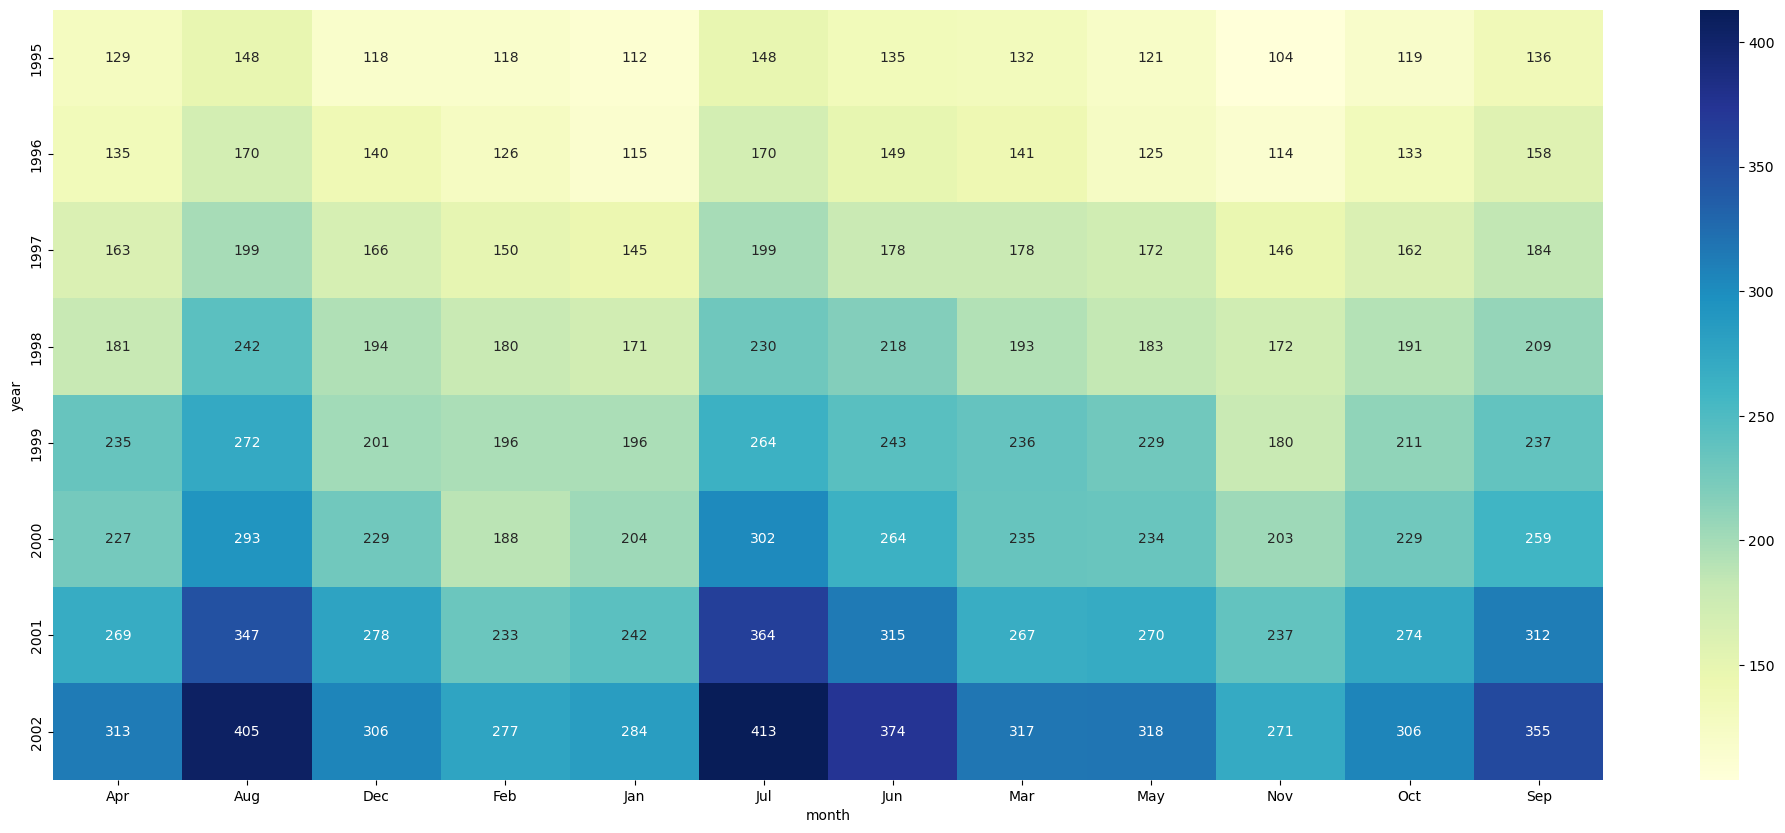

In [62]:
plt.figure(figsize=(25,10))
sns.heatmap(heatmap_y_month,
            annot=True,
            fmt="g",
            cmap = 'YlGnBu') 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

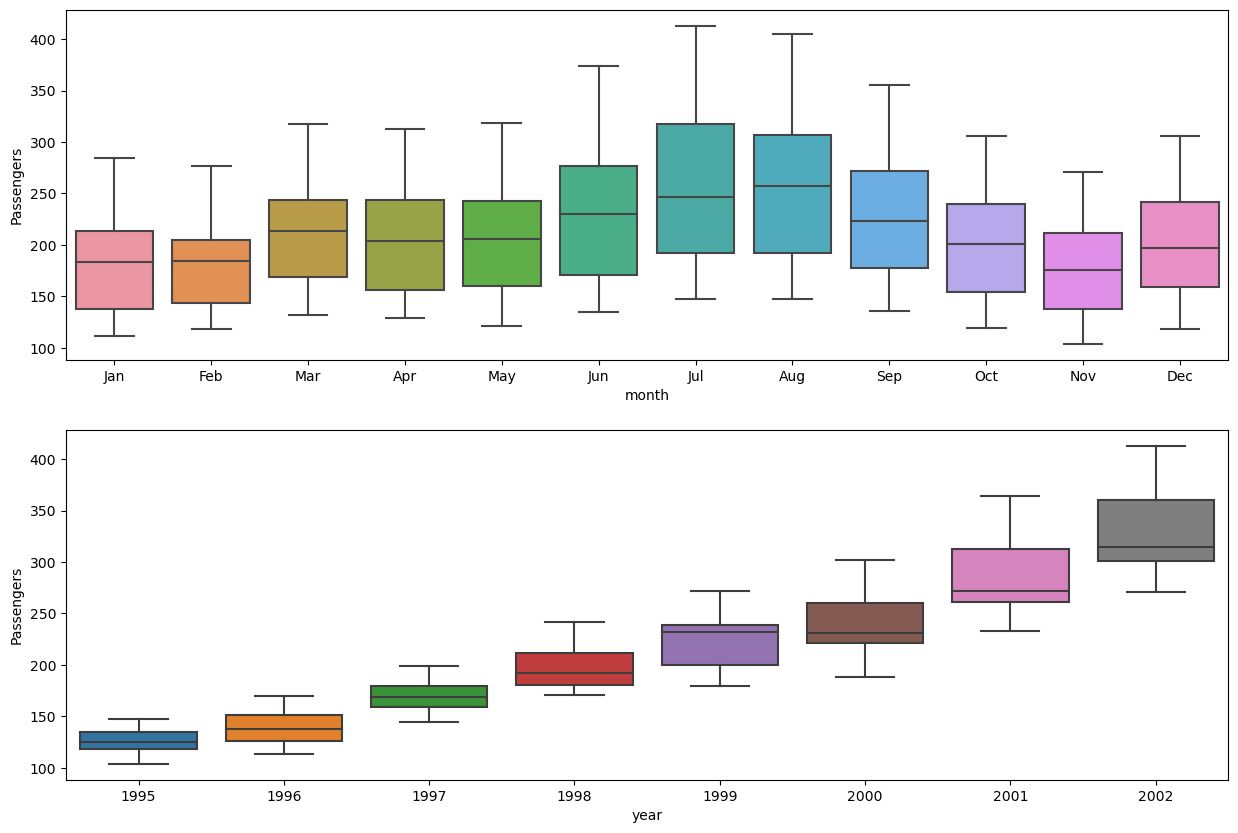

In [63]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Air)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Air)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

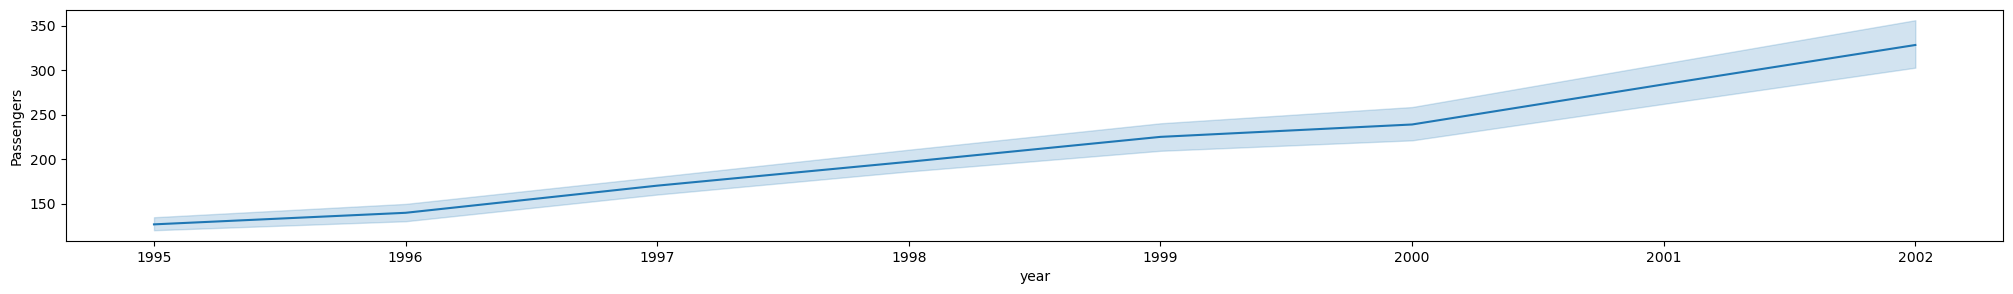

In [64]:
plt.figure(figsize=(25,3))
sns.lineplot(x="year",y="Passengers",data=Air)

In [65]:
Air

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [66]:
Air.shape

(96, 4)

In [67]:
Air['t']=np.arange(1,97)
Air['t_square']=np.square(Air.t)
Air['log_Passengers']=np.log(Air.Passengers)
Air2=pd.get_dummies(Air['month'])
Air2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [68]:
Air

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [69]:
Air2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
Air=pd.concat([Air,Air2],axis=1)
Air

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:
Train = Air.head(50)
Test = Air.tail(25)

In [72]:
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,Jun,1995,6,36,4.905275,0,0,0,0,0,0,1,0,0,0,0,0
6,1995-07-01,148,Jul,1995,7,49,4.997212,0,0,0,0,0,1,0,0,0,0,0,0
7,1995-08-01,148,Aug,1995,8,64,4.997212,0,1,0,0,0,0,0,0,0,0,0,0
8,1995-09-01,136,Sep,1995,9,81,4.912655,0,0,0,0,0,0,0,0,0,0,0,1
9,1995-10-01,119,Oct,1995,10,100,4.779123,0,0,0,0,0,0,0,0,0,0,1,0


In [73]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
71,2000-12-01,229,Dec,2000,72,5184,5.433722,0,0,1,0,0,0,0,0,0,0,0,0
72,2001-01-01,242,Jan,2001,73,5329,5.488938,0,0,0,0,1,0,0,0,0,0,0,0
73,2001-02-01,233,Feb,2001,74,5476,5.451038,0,0,0,1,0,0,0,0,0,0,0,0
74,2001-03-01,267,Mar,2001,75,5625,5.587249,0,0,0,0,0,0,0,1,0,0,0,0
75,2001-04-01,269,Apr,2001,76,5776,5.594711,1,0,0,0,0,0,0,0,0,0,0,0
76,2001-05-01,270,May,2001,77,5929,5.598422,0,0,0,0,0,0,0,0,1,0,0,0
77,2001-06-01,315,Jun,2001,78,6084,5.752573,0,0,0,0,0,0,1,0,0,0,0,0
78,2001-07-01,364,Jul,2001,79,6241,5.897154,0,0,0,0,0,1,0,0,0,0,0,0
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

54.406122273639575

In [75]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.97371663760959

In [76]:
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.24012358590507

In [77]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

148.075987925119

In [78]:
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

41.84183757147638

In [79]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

150.56489680469323

In [80]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

28.92122068851569

In [81]:
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

301.1515624591953

In [82]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,28.921221
4,rmse_add_sea_quad,41.841838
2,rmse_Quad,42.240124
1,rmse_Exp,43.973717
0,rmse_linear,54.406122
3,rmse_add_sea,148.075988
5,rmse_Mult_sea,150.564897


In [83]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Air).fit()

In [84]:
SD_new  = pd.Series(model_full.predict(Air))
SD_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [85]:
Air["forecasted_Passengers"] = pd.Series(np.exp(SD_new))

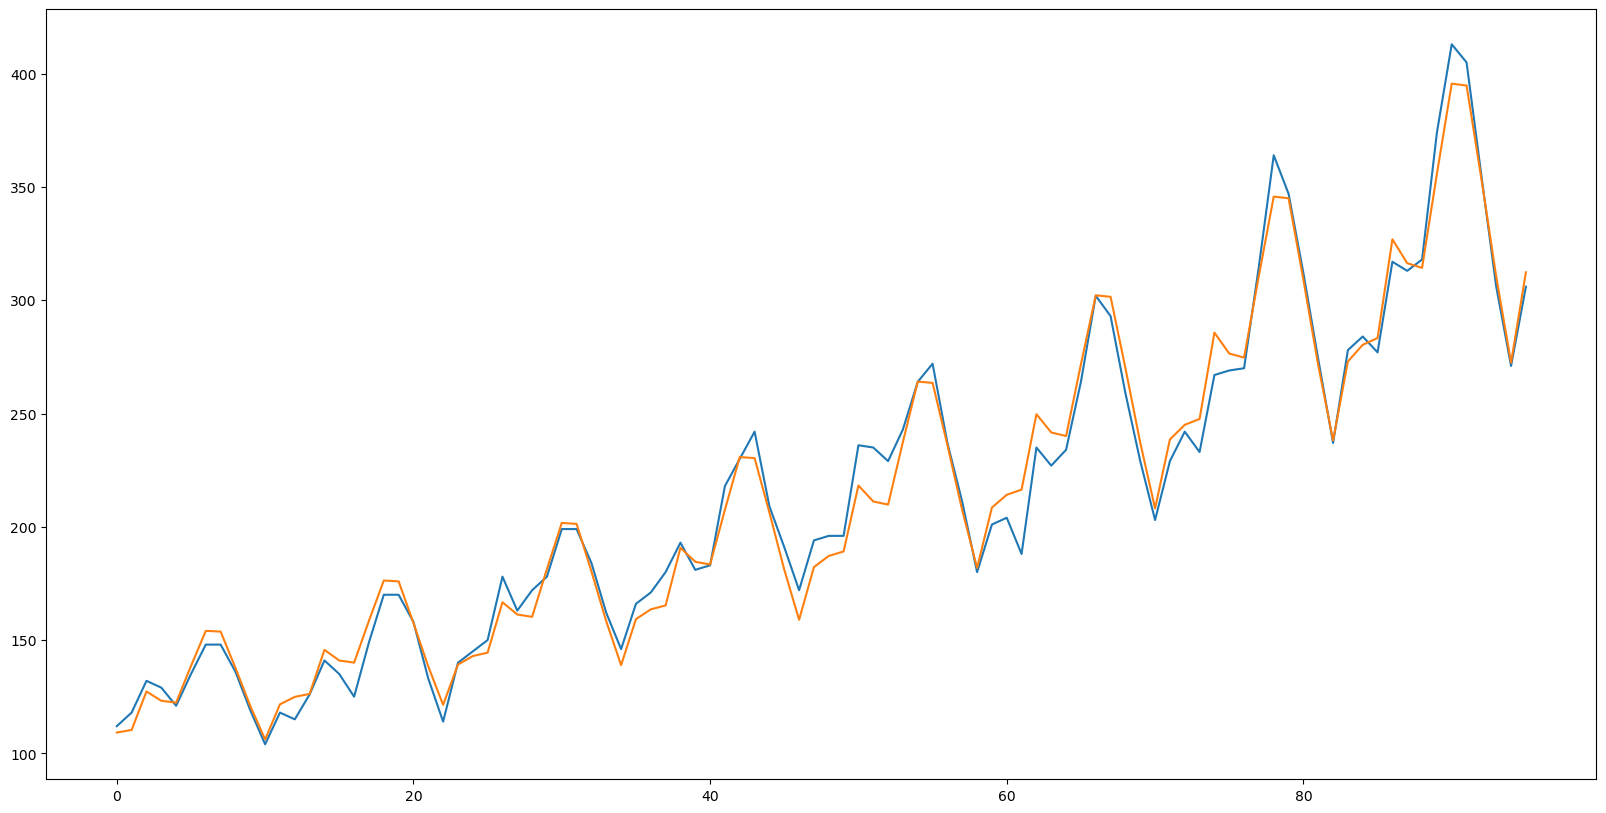

In [86]:
plt.figure(figsize=(20,10))
plt.plot(Air[['Passengers','forecasted_Passengers']].reset_index(drop=True))

Splitting data

In [87]:
Air=pd.read_excel("Airlines+Data.xlsx")
Train= Air.head(75)
Test=Air.tail(25)

In [88]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
70,2000-11-01,203
71,2000-12-01,229
72,2001-01-01,242
73,2001-02-01,233


In [89]:
Test

,Month,Passengers
71,2000-12-01,229
72,2001-01-01,242
73,2001-02-01,233
74,2001-03-01,267
75,2001-04-01,269
76,2001-05-01,270
77,2001-06-01,315
78,2001-07-01,364
79,2001-08-01,347
80,2001-09-01,312


Average

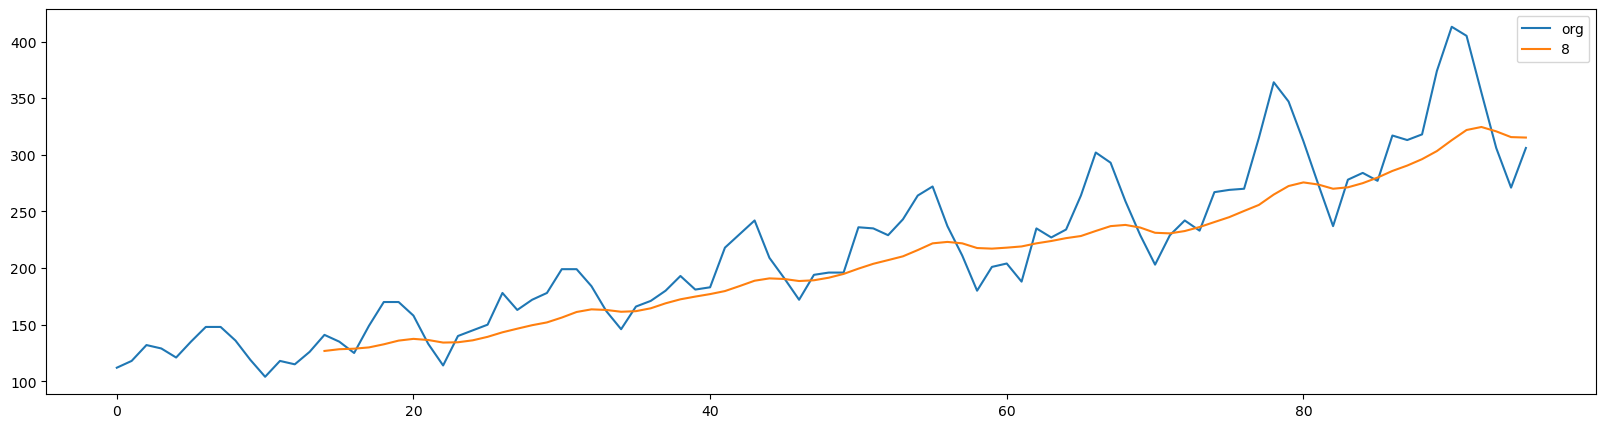

In [90]:
plt.figure(figsize=(20,5))
Air['Passengers'].plot(label="org")
Air["Passengers"].rolling(15).mean().plot(label=str(8))
plt.legend(loc='best')

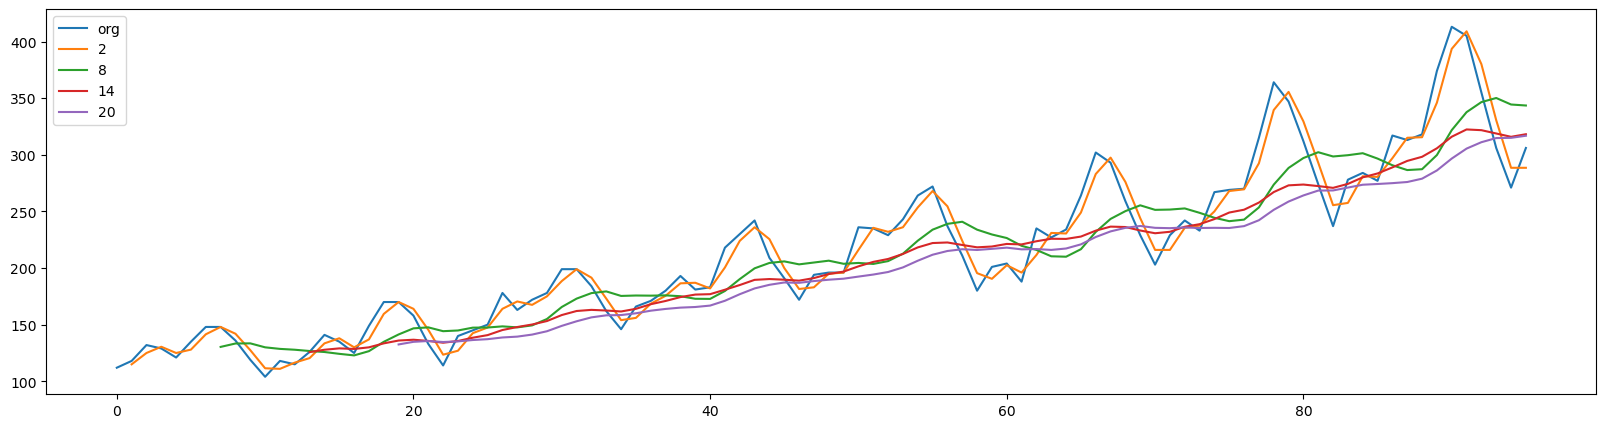

In [91]:
plt.figure(figsize=(20,5))
Air['Passengers'].plot(label="org")
for i in range(2,24,6):
    Air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

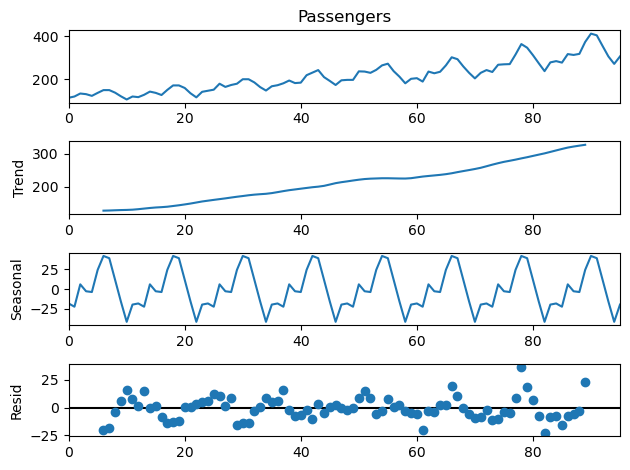

In [92]:
decompose_ts_add = seasonal_decompose(Air['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

C:\Users\SAGAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


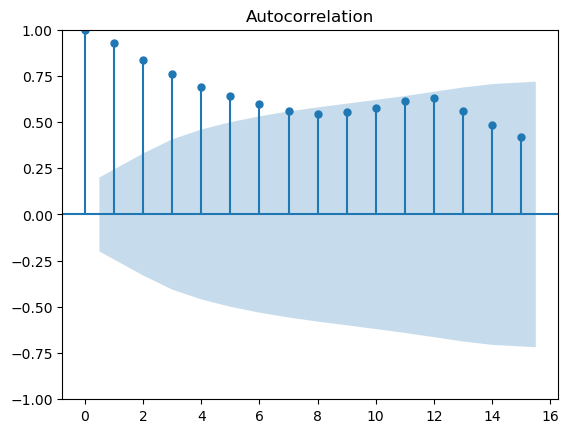

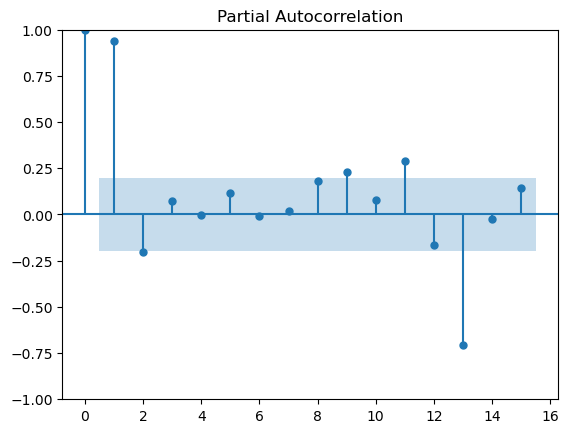

In [94]:
tsa_plot.plot_acf(Air.Passengers,lags=15)
tsa_plot.plot_pacf(Air.Passengers,lags=15)
plt.show()

Evalution Metric MAPE & Simple Exponetial Method and Holt Method

In [96]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [97]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

18.66418601071656

In [98]:
 hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_22496\179289061.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


10.9843624057145

In [99]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

9.780421136068025

In [100]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

9.485120494060933

Final Model by Combining Train and Test

In [101]:
hwe_model_mul_add = ExponentialSmoothing(Air["Passengers"],seasonal="mul",trend="add",seasonal_periods=15).fit() 

In [102]:
hwe_model_mul_add.forecast(15)

96     303.359652
97     288.473231
98     296.627908
99     292.379978
100    286.423710
101    308.311181
102    304.294045
103    303.528936
104    329.728647
105    344.578905
106    336.145348
107    342.648743
108    339.120984
109    323.278099
110    337.462139
dtype: float64

Forecasting using ARIMA model

In [103]:
Air=pd.read_excel("Airlines+Data.xlsx",index_col=0, parse_dates=True)
Air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [104]:
split_point = len(Air) - 15

dataset, validation = Air[0:split_point], Air[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 81, Validation 15


In [105]:
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_22496\642613013.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-05-01    270
2001-06-01    315
2001-07-01    364
2001-08-01    347
2001-09-01    312
Name: 1, Length: 81, dtype: int64

In [106]:
X = train.values
X


array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312], dtype=int64)

In [107]:
X = X.astype('float32')
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312.], dtype=float32)

In [108]:
train_size = int(len(X) * 0.50)
train_size

40

In [109]:
train, test = X[0:train_size], X[train_size:]
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181.], dtype=float32)

In [110]:
test

array([183., 218., 230., 242., 209., 191., 172., 194., 196., 196., 236.,
       235., 229., 243., 264., 272., 237., 211., 180., 201., 204., 188.,
       235., 227., 234., 264., 302., 293., 259., 229., 203., 229., 242.,
       233., 267., 269., 270., 315., 364., 347., 312.], dtype=float32)

In [111]:
history = [x for x in train]
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0]

Predictions

In [112]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=181.000, Expected=183.000
>Predicted=183.000, Expected=218.000
>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>

In [113]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 24.787


In [114]:
#ARIMA Hyperparameters

In [115]:
def evaluate_arima_model(X, arima_order):
    
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

Grid search for p,d,q values

In [116]:
def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
   
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [117]:
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_22496\642613013.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-05-01    270
2001-06-01    315
2001-07-01    364
2001-08-01    347
2001-09-01    312
Name: 1, Length: 81, dtype: int64

In [118]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

In [119]:
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=77.938
ARIMA(0, 0, 1) RMSE=44.917
ARIMA(0, 0, 2) RMSE=34.416
ARIMA(0, 1, 0) RMSE=24.787
ARIMA(0, 1, 1) RMSE=24.212
ARIMA(0, 1, 2) RMSE=24.741
ARIMA(0, 2, 0) RMSE=30.826
ARIMA(0, 2, 1) RMSE=24.806
ARIMA(0, 2, 2) RMSE=24.303
ARIMA(1, 0, 0) RMSE=25.615
ARIMA(1, 0, 1) RMSE=24.870
ARIMA(1, 0, 2) RMSE=25.188
ARIMA(1, 1, 0) RMSE=24.536
ARIMA(1, 1, 1) RMSE=24.220
ARIMA(1, 1, 2) RMSE=23.708
ARIMA(1, 2, 0) RMSE=30.036
ARIMA(1, 2, 1) RMSE=24.638
ARIMA(1, 2, 2) RMSE=24.325
ARIMA(2, 0, 0) RMSE=25.254
ARIMA(2, 0, 1) RMSE=25.177
ARIMA(2, 0, 2) RMSE=24.747
ARIMA(2, 1, 0) RMSE=24.151
ARIMA(2, 1, 1) RMSE=23.702
ARIMA(2, 1, 2) RMSE=23.907
ARIMA(2, 2, 0) RMSE=28.368
ARIMA(2, 2, 1) RMSE=24.200
ARIMA(2, 2, 2) RMSE=24.353
Best ARIMA (2, 1, 1) RMSE=23.702


Build Model based on the optimized values

In [121]:
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,112
1995-01-01,
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
...,...
2001-05-01,270
2001-06-01,315
2001-07-01,364


In [122]:
X = train.values
X = X.astype('float32')

In [123]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

array([286.4365683 , 261.66397372, 250.75080591, 249.55794932,
       262.56868798, 281.43469026, 304.47899199, 322.81570445,
       334.63744225, 335.47437833, 327.59519179, 312.17749693])

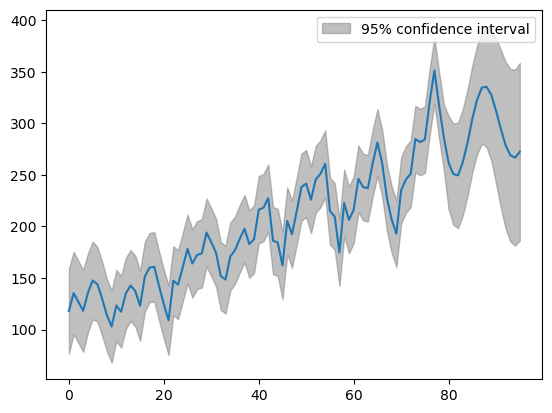

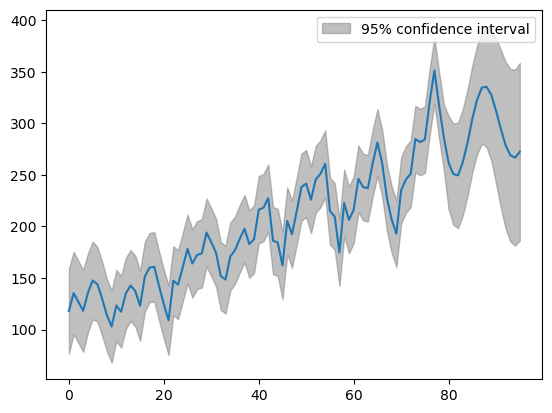

In [124]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

Combine train and test data and build final model

In [127]:
Air=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)

X = train.values
X = X.astype('float32')

In [128]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()

In [129]:
forecast=model_fit.forecast(steps=15)
forecast

array([286.4365683 , 261.66397372, 250.75080591, 249.55794932,
       262.56868798, 281.43469026, 304.47899199, 322.81570445,
       334.63744225, 335.47437833, 327.59519179, 312.17749693,
       294.76888531, 278.84548303, 269.0746752 ])

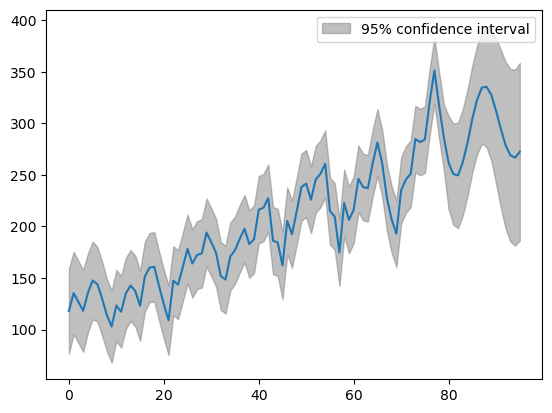

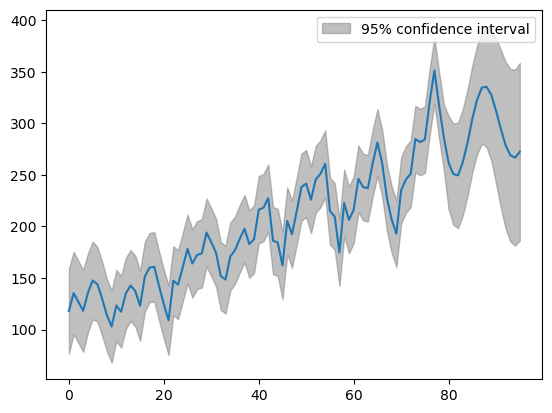

In [130]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

Comparing Holts winter exponential smoothing with additive seasonality and additive trend we get minimum error of 9.48